In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  MSFT


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-01-02,39.858456,40.421043,39.670929,39.773216,27913900
2015-01-05,39.491928,39.832888,39.423734,39.526022,39673900
2015-01-06,38.912296,39.849941,38.818531,39.534552,36447900
2015-01-07,39.406666,39.602718,38.775888,39.193565,29114100
2015-01-08,40.565952,40.702337,39.824361,39.849932,29645200


In [3]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2015-01-02 to 2025-11-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   2744 non-null   float64
 1   (High, MSFT)    2744 non-null   float64
 2   (Low, MSFT)     2744 non-null   float64
 3   (Open, MSFT)    2744 non-null   float64
 4   (Volume, MSFT)  2744 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.6 KB


In [4]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2187, 7)
(547, 7)
(2187,)
(547,)


In [5]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [6]:
pred1[0]

312.15751502416623

In [7]:
print(y_test)

Date
2023-09-25    306.931488
2023-09-26    307.570587
2023-09-27    308.406464
2023-09-28    310.481201
2023-09-29    316.430267
                 ...    
2025-11-20    472.119995
2025-11-21    474.000000
2025-11-24    476.989990
2025-11-25    485.500000
2025-11-26    492.010010
Name: Target, Length: 547, dtype: float64


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  51.42728328733602
Root Mean Squared Error:  7.171281844087291
R2 Score:  0.980803292399723


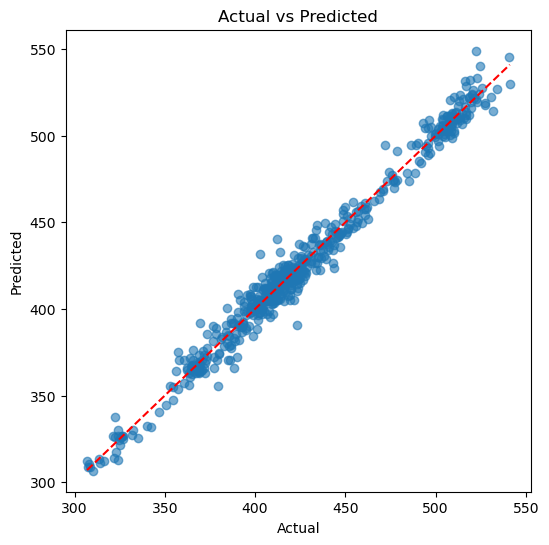

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [10]:
import joblib 
joblib.dump(lr, "MSFT.pkl")
model = joblib.load("MSFT.pkl")